In [1]:
### Importare librerie necessarie
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [3]:
### Importare i dati da wine-clustering.csv e dare una breve occhiata alle caratteristiche del dataset
df = pd.read_csv('wine-clustering.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [5]:
df.describe()

Alcohol  Malic_Acid         Ash  Ash_Alcanity   Magnesium  \
count  178.000000  178.000000  178.000000    178.000000  178.000000   
mean    13.000618    2.336348    2.366517     19.494944   99.741573   
std      0.811827    1.117146    0.274344      3.339564   14.282484   
min     11.030000    0.740000    1.360000     10.600000   70.000000   
25%     12.362500    1.602500    2.210000     17.200000   88.000000   
50%     13.050000    1.865000    2.360000     19.500000   98.000000   
75%     13.677500    3.082500    2.557500     21.500000  107.000000   
max     14.830000    5.800000    3.230000     30.000000  162.000000   

       Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       Color_Intensity         Hue       OD280      Proline  
count       178.000000  178.000000  178.000000   178.000000  
mean          5.058090    0.957449    2.611685   746.893258  
std           2.318286    0.228572    0.709990   314.907474  
min           1.280000    0.480000    1.270000   278.000000  
25%           3.220000    0.782500    1.937500   500.500000  
50%           4.690000    0.965000    2.780000   673.500000  
75%           6.200000    1.120000    3.170000   985.000000  
max          13.000000    1.710000    4.000000  1680.000000

In [7]:
X = df.copy()

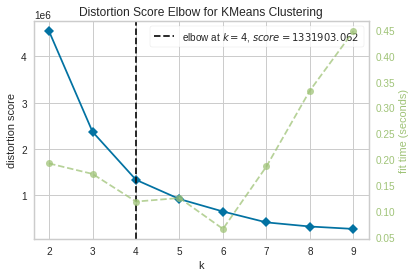

In [19]:
### usare l'elbow plot  pertrovare il numero di cluster adatto per performare una clusterizzazione con Kmeans
model = KMeans(random_state=22)
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()



Avg Sihlouette Score:  0.6568536504294317


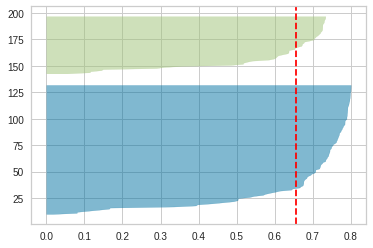


Avg Sihlouette Score:  0.571138193786884


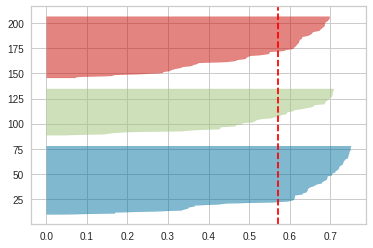


Avg Sihlouette Score:  0.5620323449580346


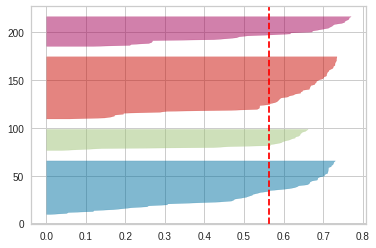


Avg Sihlouette Score:  0.5489993239795681


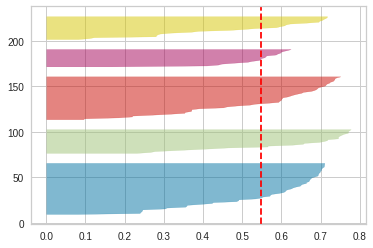


Avg Sihlouette Score:  0.5656413100386375


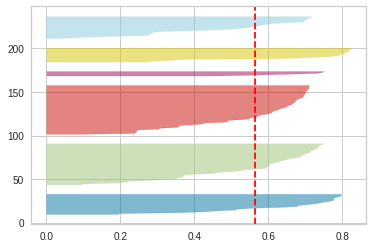

In [9]:
### generare anche il sihlouette plot
for n in range(2,7):
    model = KMeans(n_clusters=n, random_state=22)
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
    visualizer.fit(X)
    print('\nAvg Sihlouette Score: ', visualizer.silhouette_score_)
    plt.show()

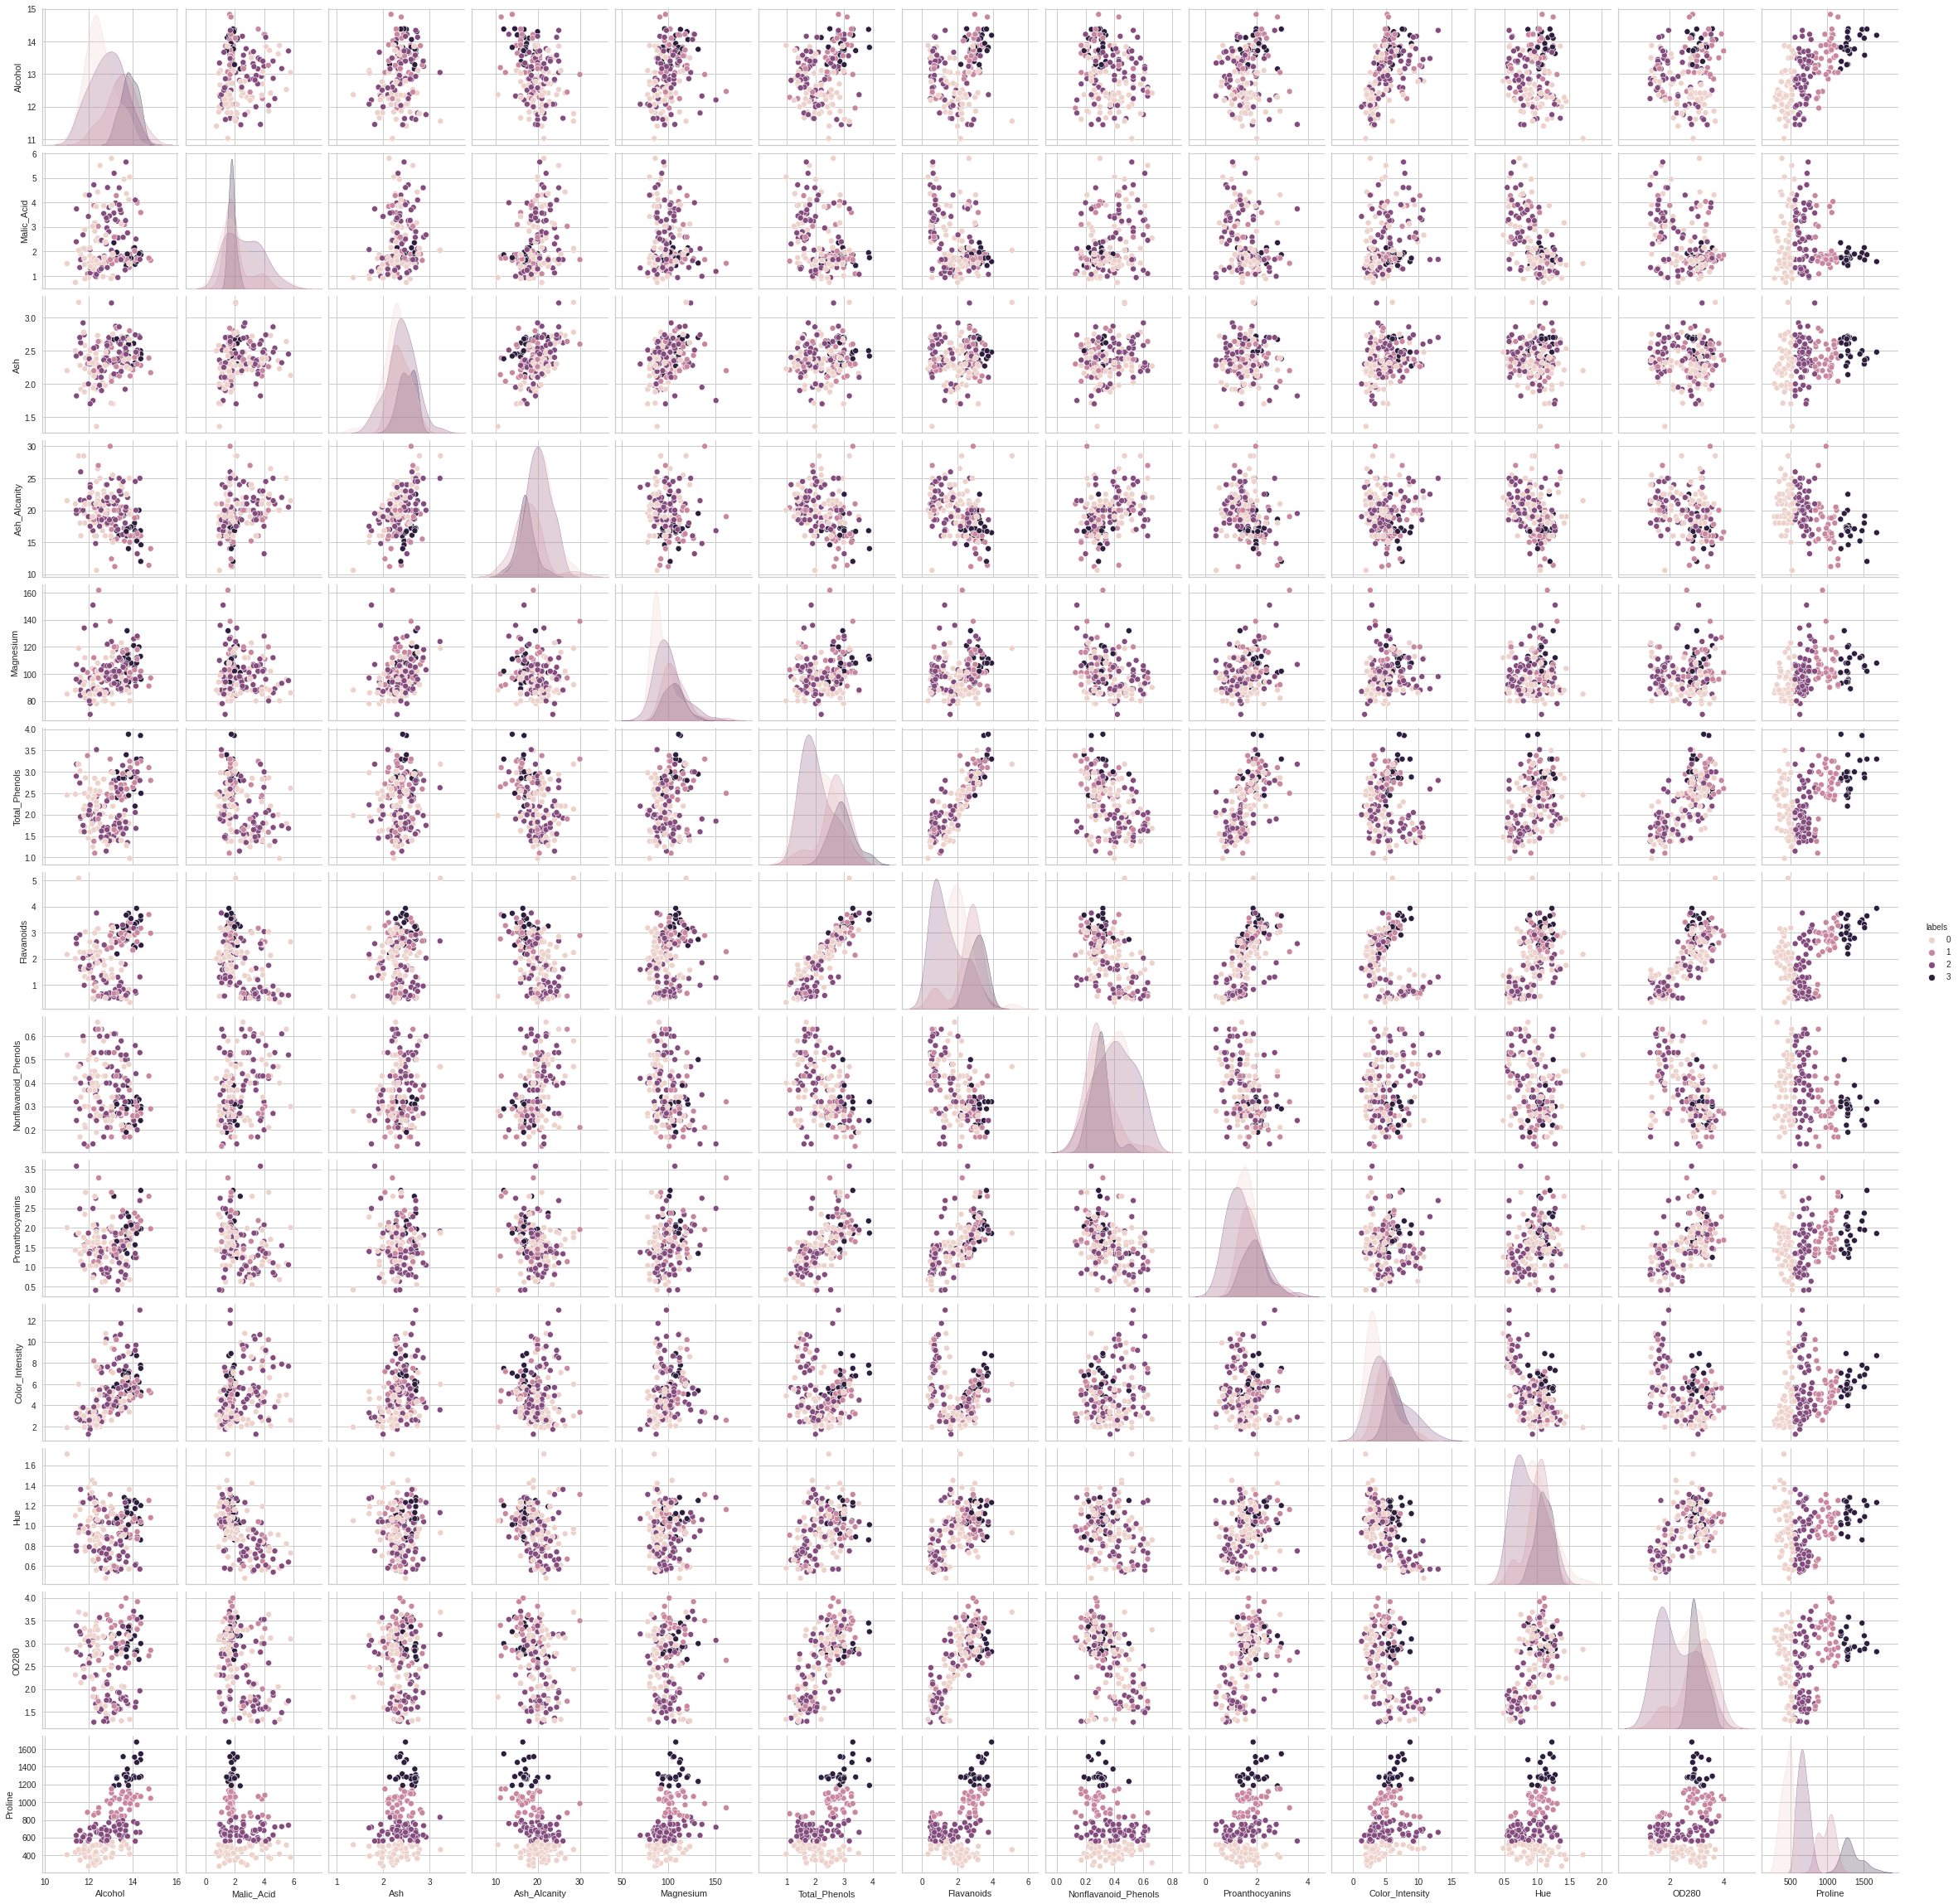

In [11]:
### plottare infine un pairplot usando come parametro 'hue' le labels generate dal KMeans scelto
model = KMeans(n_clusters=4)
model.fit(X)
labels = pd.Series(model.labels_, index=X.index, name='labels')
labeled_df = X.join(labels)
sns.pairplot(labeled_df, hue='labels')
plt.show()

Scaler

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
X_scaled = pd.DataFrame(X_scaled, index=X.index, columns=X.columns)
X_scaled.describe()

Alcohol    Malic_Acid           Ash  Ash_Alcanity     Magnesium  \
count  1.780000e+02  1.780000e+02  1.780000e+02  1.780000e+02  1.780000e+02   
mean  -8.619821e-16 -8.357859e-17 -8.657245e-16 -1.160121e-16 -1.995907e-17   
std    1.002821e+00  1.002821e+00  1.002821e+00  1.002821e+00  1.002821e+00   
min   -2.434235e+00 -1.432983e+00 -3.679162e+00 -2.671018e+00 -2.088255e+00   
25%   -7.882448e-01 -6.587486e-01 -5.721225e-01 -6.891372e-01 -8.244151e-01   
50%    6.099988e-02 -4.231120e-01 -2.382132e-02  1.518295e-03 -1.222817e-01   
75%    8.361286e-01  6.697929e-01  6.981085e-01  6.020883e-01  5.096384e-01   
max    2.259772e+00  3.109192e+00  3.156325e+00  3.154511e+00  4.371372e+00   

       Total_Phenols    Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
count   1.780000e+02  1.780000e+02          1.780000e+02     1.780000e+02   
mean   -2.972030e-16 -4.016762e-16          4.079134e-16    -1.699639e-16   
std     1.002821e+00  1.002821e+00          1.002821e+00     1.002821e+00   
min    -2.107246e+00 -1.695971e+00         -1.868234e+00    -2.069034e+00   
25%    -8.854682e-01 -8.275393e-01         -7.401412e-01    -5.972835e-01   
50%     9.595986e-02  1.061497e-01         -1.760948e-01    -6.289785e-02   
75%     8.089974e-01  8.490851e-01          6.095413e-01     6.291754e-01   
max     2.539515e+00  3.062832e+00          2.402403e+00     3.485073e+00   

       Color_Intensity           Hue         OD280       Proline  
count     1.780000e+02  1.780000e+02  1.780000e+02  1.780000e+02  
mean     -1.122697e-17  3.717376e-16  2.919013e-16 -7.484650e-18  
std       1.002821e+00  1.002821e+00  1.002821e+00  1.002821e+00  
min      -1.634288e+00 -2.094732e+00 -1.895054e+00 -1.493188e+00  
25%      -7.951025e-01 -7.675624e-01 -9.522483e-01 -7.846378e-01  
50%      -1.592246e-01  3.312687e-02  2.377348e-01 -2.337204e-01  
75%       4.939560e-01  7.131644e-01  7.885875e-01  7.582494e-01  
max       3.435432e+00  3.301694e+00  1.960915e+00  2.971473e+00

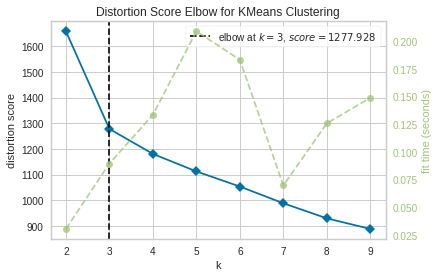

In [15]:
### usare l'elbow plot  pertrovare il numero di cluster adatto per performare una clusterizzazione con Kmeans
model = KMeans(random_state=22)
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(X_scaled)        # Fit the data to the visualizer
visualizer.show()


Avg Sihlouette Score:  0.26831340971052126


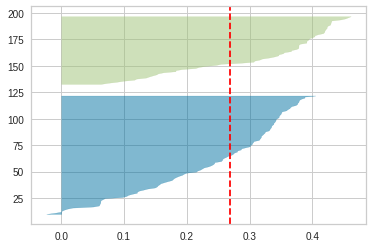


Avg Sihlouette Score:  0.2848589191898987


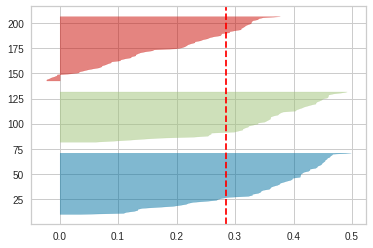


Avg Sihlouette Score:  0.24419555236115403


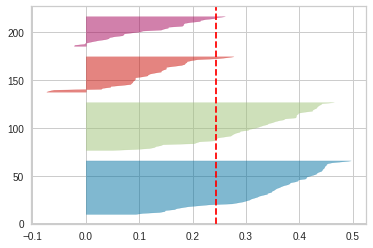


Avg Sihlouette Score:  0.21071140421535228


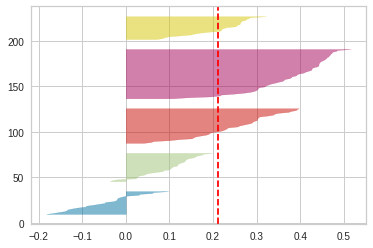


Avg Sihlouette Score:  0.17176087524208006


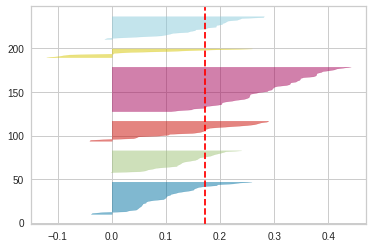

In [16]:
### generare anche il sihlouette plot
for n in range(2,7):
    model = KMeans(n_clusters=n, random_state=22)
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
    visualizer.fit(X_scaled)
    print('\nAvg Sihlouette Score: ', visualizer.silhouette_score_)
    plt.show()

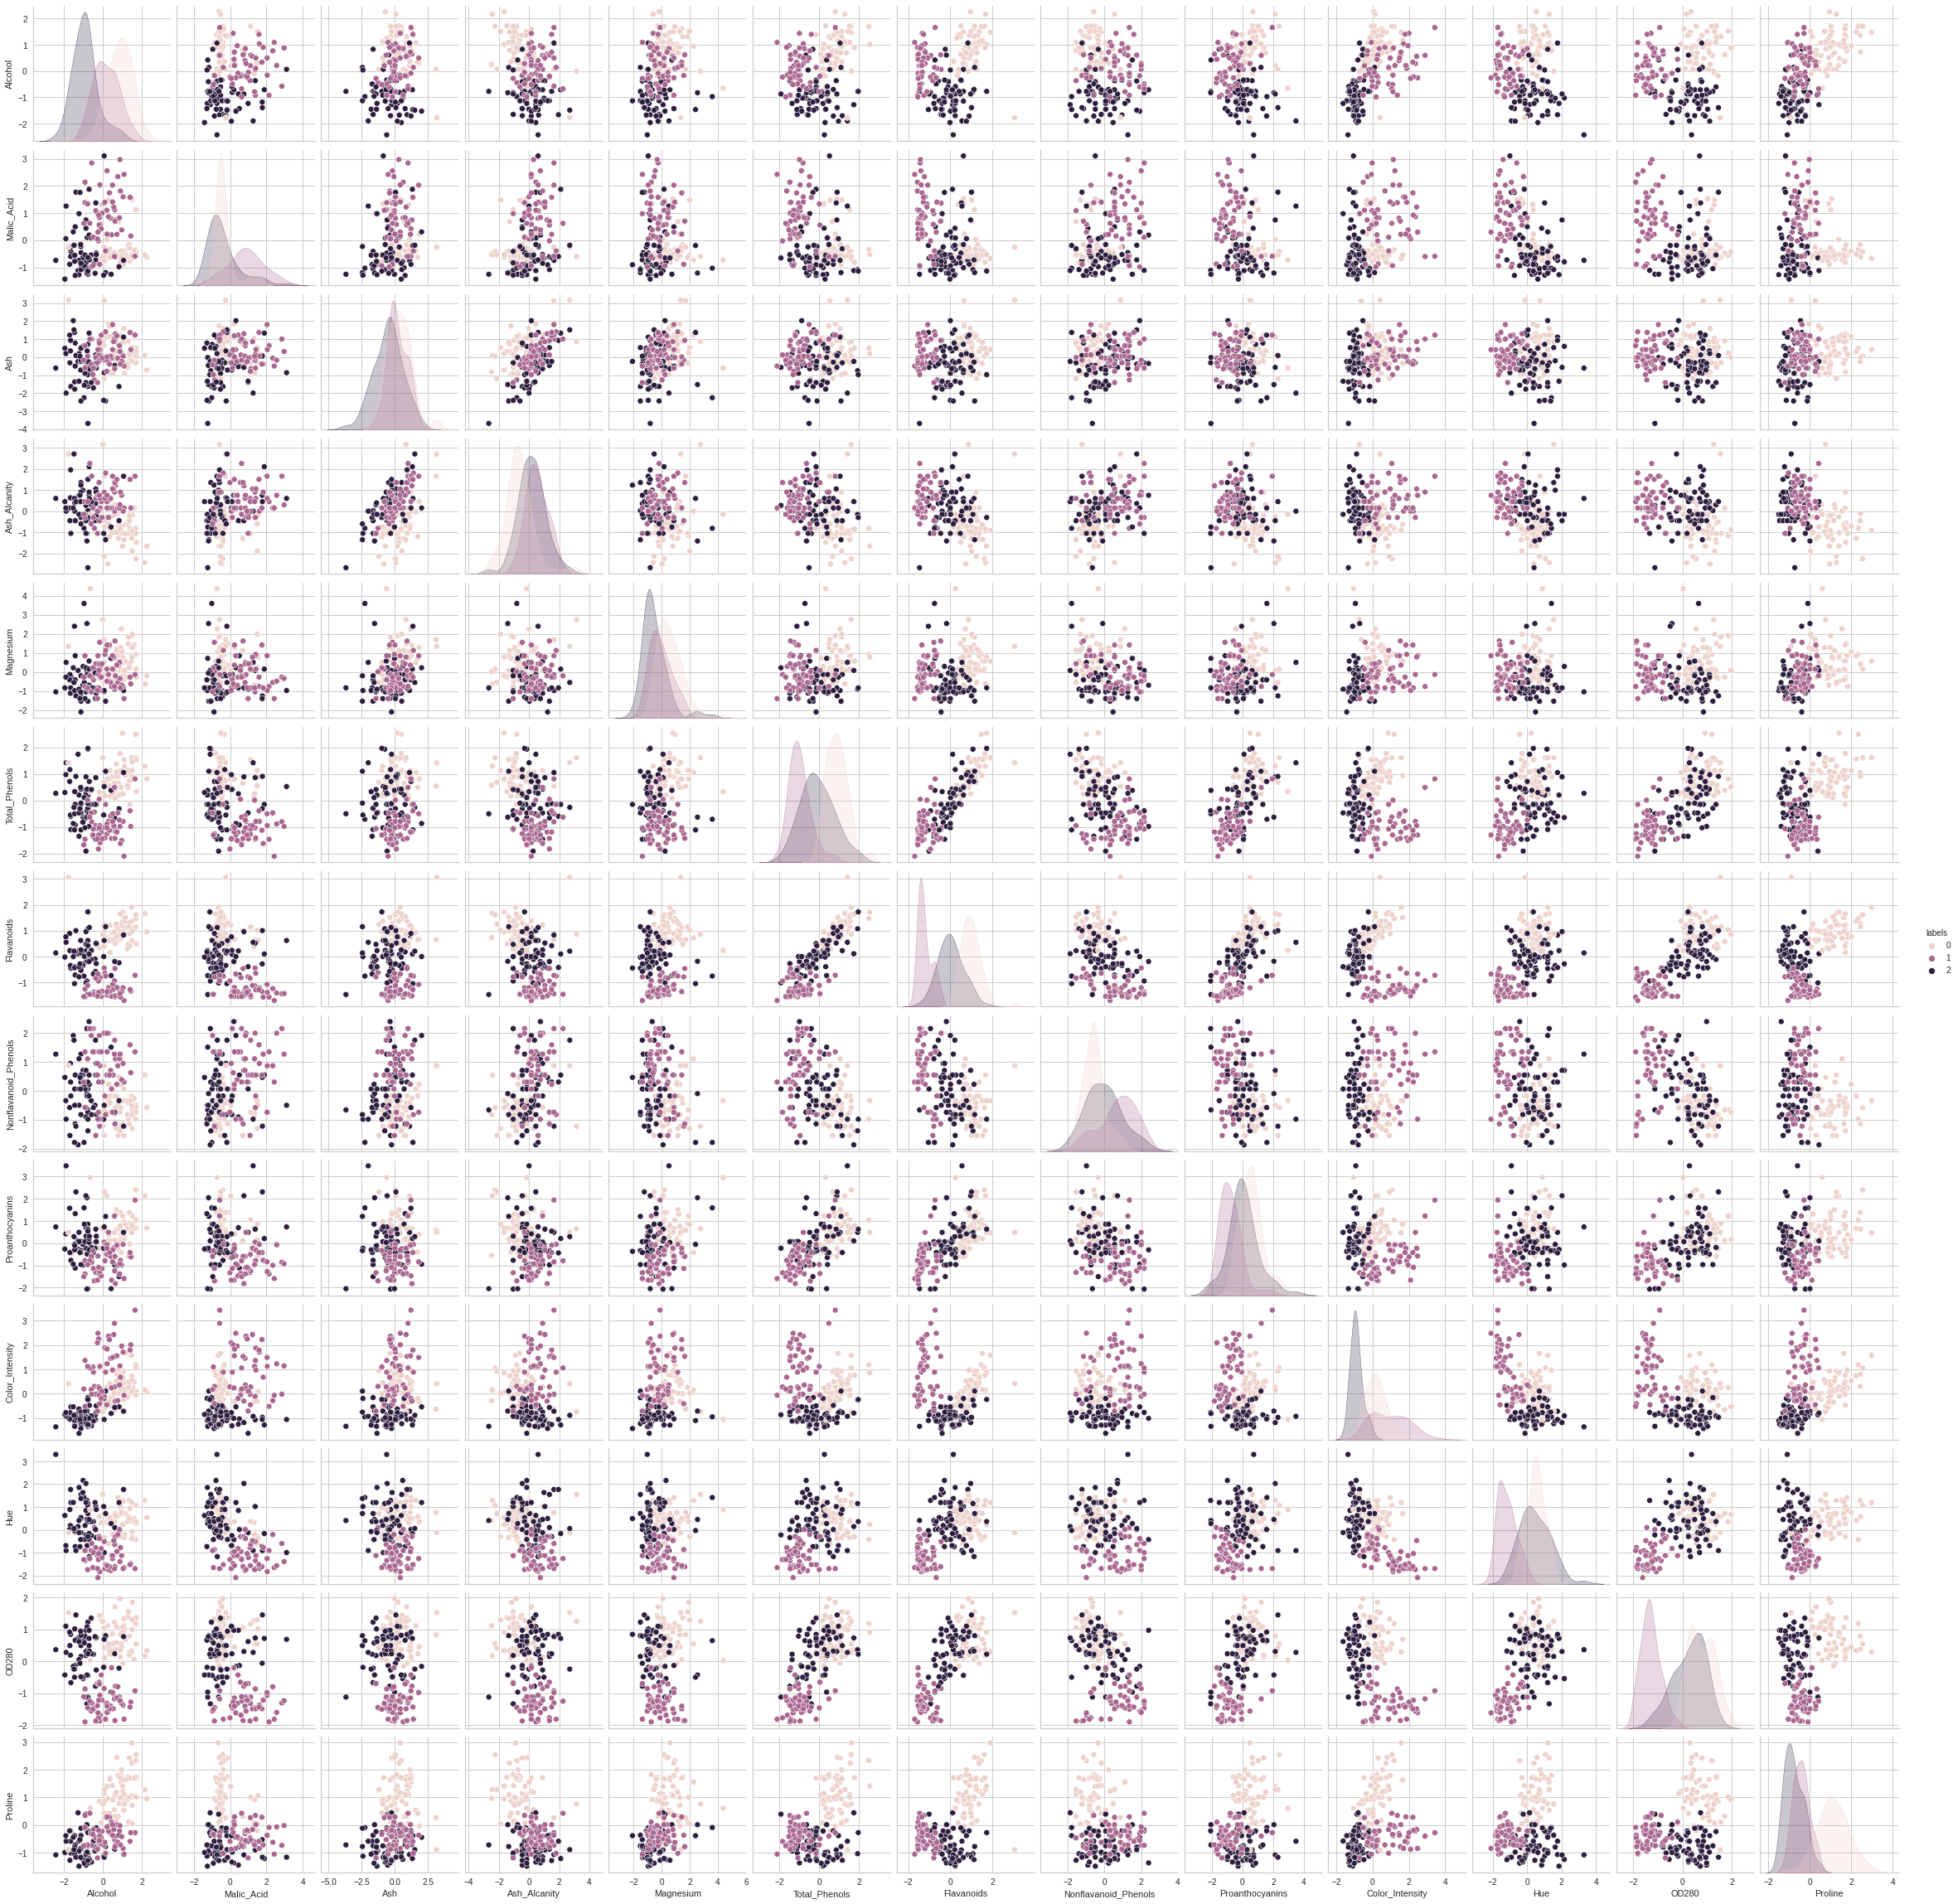

In [17]:
### plottare infine un pairplot usando come parametro 'hue' le labels generate dal KMeans scelto
model = KMeans(n_clusters=3)
model.fit(X_scaled)
labels = pd.Series(model.labels_, index=X.index, name='labels')
labeled_df = X_scaled.join(labels)
sns.pairplot(labeled_df, hue='labels')
plt.show()

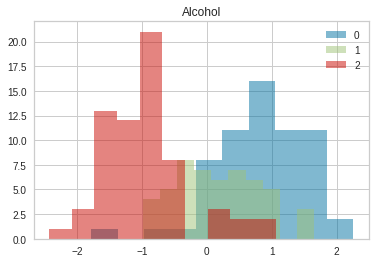

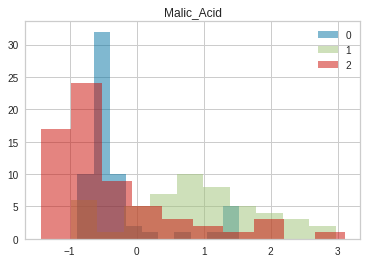

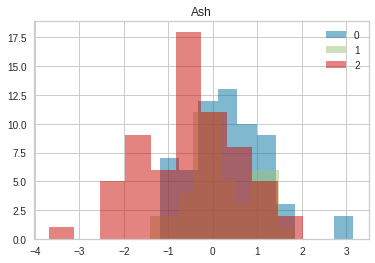

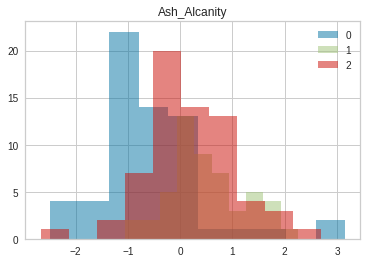

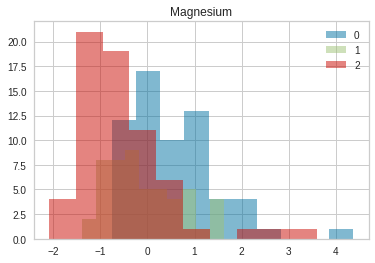

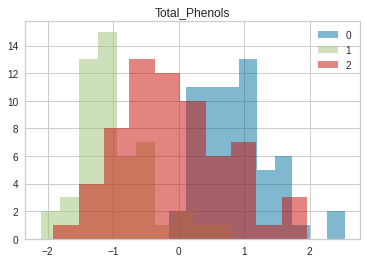

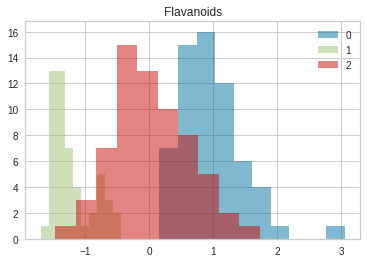

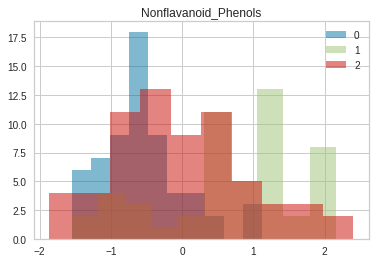

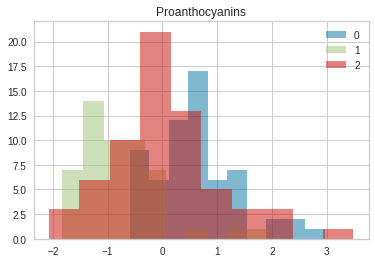

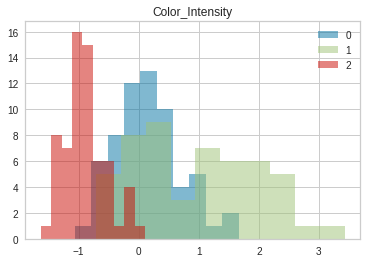

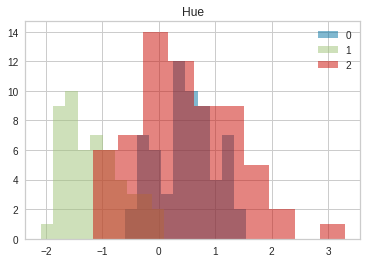

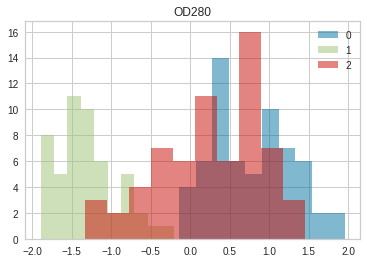

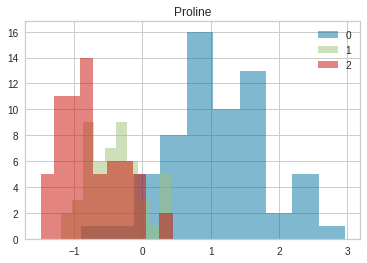

In [43]:
for feature in X.columns:
  for cluster in [0,1,2]:
    cond = labeled_df['labels']==cluster
    new_df = labeled_df[cond].copy()

    new_df[feature].hist(label=cluster, alpha=0.5)
  plt.legend()
  plt.title(feature)
  plt.show()

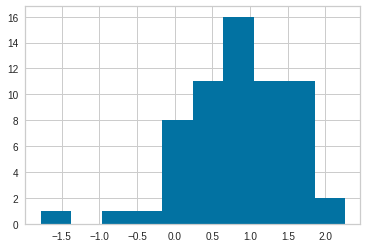

In [34]:
new_df['Alcohol']

In [26]:
label1_df = labeled_df[labeled_df['labels']==0].copy()

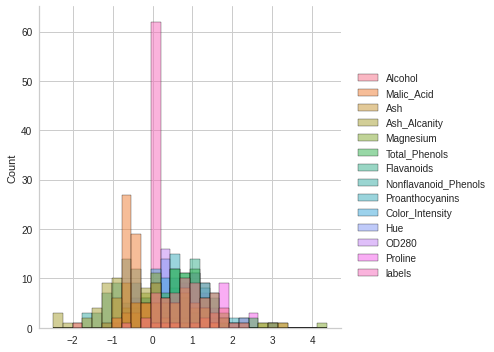

In [27]:
sns.displot(label1_df)